# Threshold moving
- Maximize the positive predictive value (aka precision)
- While also maximizing true positive rate (aka sensitivity or recall)
- While minimizing the number of removed samples

In [1]:
import sys

sys.path.append("..")

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

from phenobase.pylib.binary_metrics import Metrics
from phenobase.pylib import util

In [3]:
CSV = Path("..") / "data" / "score.csv"
OUT = Path("..") / "data" / "thresholds.csv"

DF = pd.read_csv(CSV)
# DF.head()

In [4]:
CHECKPOINTS = DF["checkpoint"].unique()
# CHECKPOINTS

In [5]:
TRAITS = DF["trait"].unique()
# TRAITS

In [6]:
checkpoint = "data/tuned/vit_384_lg_flowers_prec_wt/checkpoint-32200"
trait = "flowers"

df = DF.loc[(DF["checkpoint"] == checkpoint) & (DF["trait"] == trait)]

In [9]:
precision, recall, thresholds = precision_recall_curve(
    df["y_true"], 
    df["y_pred"],
)

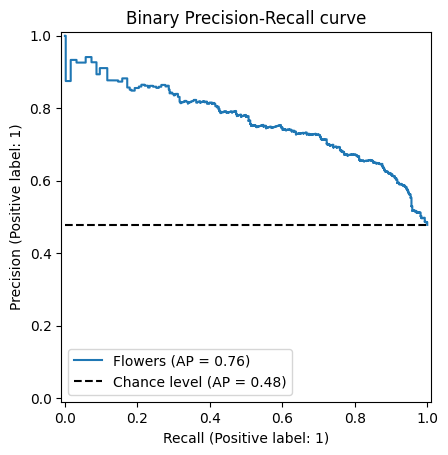

In [18]:
display = PrecisionRecallDisplay.from_predictions(
    df["y_true"],
    df["y_pred"],
    name="Flowers",
    plot_chance_level=True,
)
_ = display.ax_.set_title("Binary Precision-Recall curve")